In [187]:
#importing the required libraries
import pandas as pd
import numpy as np
import warnings
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.stats import zscore
import numpy as  np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [104]:
warnings.filterwarnings('ignore')

In [124]:
# Data Extraction
loan_data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [125]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [126]:
loan_data.shape

(614, 13)

In [127]:
loan_data.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002087,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


We can see that there can be outliers in ApplicantIncome, CoapplicantIncome, LoanAmount as the difference between 75 percentile and max value is greater.

In [128]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


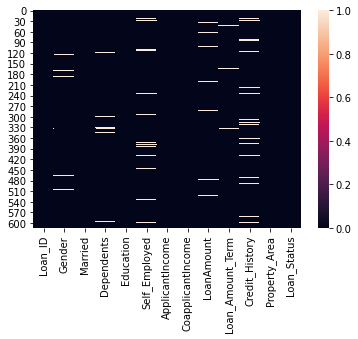

In [129]:
sns.heatmap(loan_data.isnull())
plt.show()

There are mising values in 7 columns:
    
1.Gender

2.Married

3.Dependents

4.Self_Employed

5.LoanAmount

6.Loan_Amount_Term

7.Credit_History

In [130]:
#filling missing values
loan_data['Gender']=loan_data['Gender'].fillna(ss.mode(loan_data['Gender']).mode[0])
loan_data['Married']=loan_data['Married'].fillna(ss.mode(loan_data['Married']).mode[0])
loan_data['Dependents']=loan_data['Dependents'].fillna(ss.mode(loan_data['Dependents']).mode[0])
loan_data['Self_Employed']=loan_data['Self_Employed'].fillna(ss.mode(loan_data['Self_Employed']).mode[0])
loan_data['LoanAmount']=loan_data['LoanAmount'].fillna(np.mean(loan_data['LoanAmount']))
loan_data['Loan_Amount_Term']=loan_data['Loan_Amount_Term'].fillna(np.mean(loan_data['Loan_Amount_Term']))
loan_data['Credit_History']=loan_data['Credit_History'].fillna(ss.mode(loan_data['Credit_History']).mode[0])

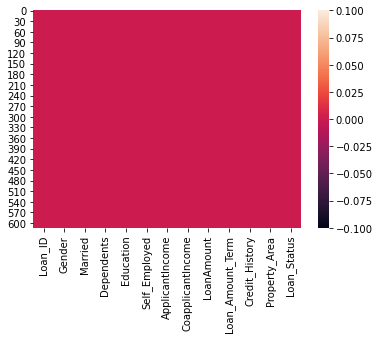

In [131]:
sns.heatmap(loan_data.isnull())
plt.show()

There are no null values in data now.


In [133]:
# Loan_ID does not affect our target variable.So dropping it from the data.
loan_data.drop('Loan_ID',axis=1,inplace=True)
loan_data_1=loan_data.iloc[:,:]

# Changing categorical variable to numeric.

In [141]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=[]
for i in loan_data.columns:
    if loan_data[i].dtype==object:
       list1.append(i) 
for i in list1:
    loan_data[i]=le.fit_transform((loan_data[i].astype(str)))

In [142]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


# Checking and Handling Outliers

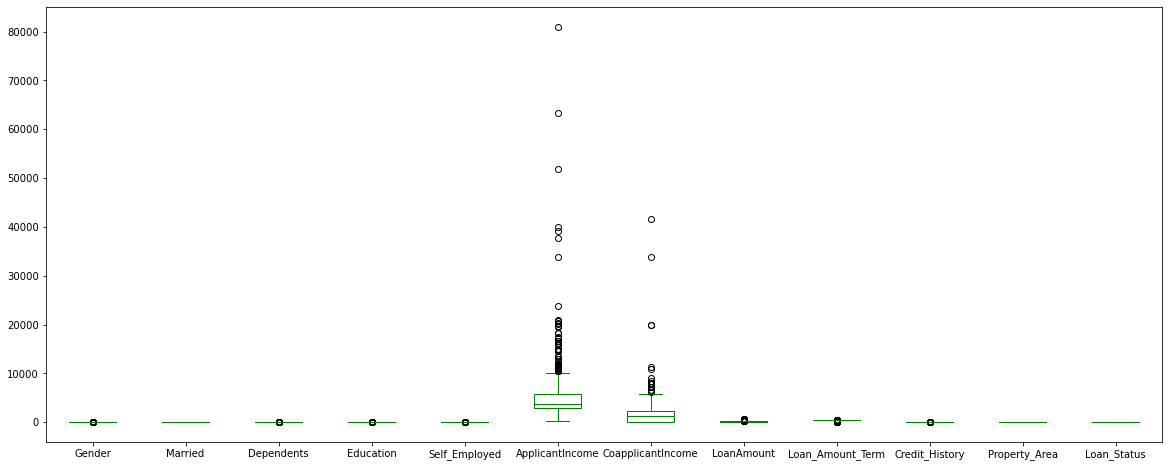

In [116]:
loan_data.plot(kind='box',layout=(2,4),color='green',figsize=(20,8))
plt.show()

In [143]:
z=np.absolute(zscore(loan_data))
z

array([[0.47234264, 1.37208932, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.31851281,
        1.48253724],
       [0.47234264, 0.72881553, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       ...,
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 1.24474546, ..., 0.41173269, 1.22329839,
        0.67451931],
       [2.11710719, 1.37208932, 0.73780632, ..., 2.42876026, 0.04760721,
        1.48253724]])

In [144]:
threshold=3
loan_data_new=loan_data[(z<3).all(axis=1)]

In [145]:
loan_data_new.shape

(577, 12)

In [146]:
data_loss=(loan_data.shape[0]-loan_data_new.shape[0])*100/loan_data.shape[0]
print('Data loss Percentage: ',data_loss,"%")

Data loss Percentage:  6.026058631921824 %


Outliers have been handled.

# Exploratory Data Analysis

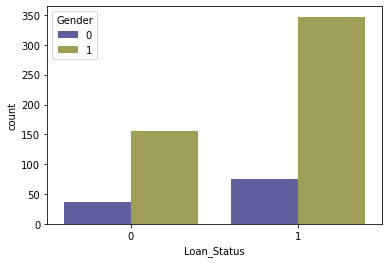

1    422
0    192
Name: Loan_Status, dtype: int64

In [19]:
sns.countplot(x='Loan_Status',data=loan_data,palette='gist_stern',hue='Gender')
plt.show()
loan_data['Loan_Status'].value_counts()

The data is slightly imbalanced.

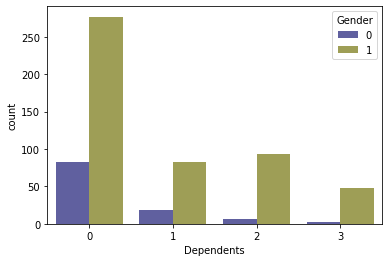

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [20]:
sns.countplot(x='Dependents',data=loan_data,palette='gist_stern',hue='Gender')
plt.show()
loan_data['Dependents'].value_counts()

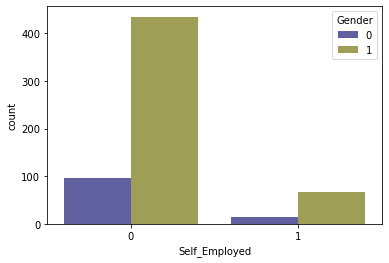

0    532
1     82
Name: Self_Employed, dtype: int64

In [21]:
sns.countplot(x='Self_Employed',data=loan_data,palette='gist_stern',hue='Gender')
plt.show()
loan_data['Self_Employed'].value_counts()

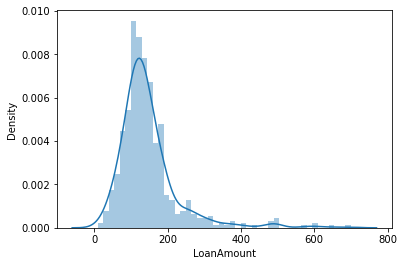

In [22]:
sns.distplot(loan_data['LoanAmount'])
plt.show()

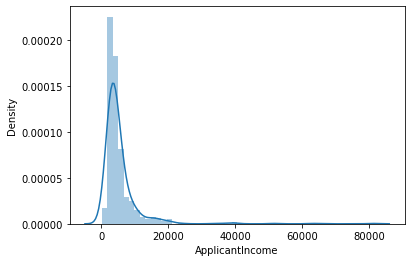

In [23]:
sns.distplot(loan_data['ApplicantIncome'])
plt.show()

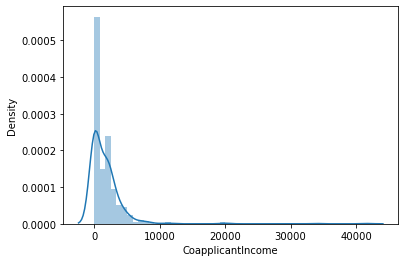

In [137]:
sns.distplot(loan_data['CoapplicantIncome'])
plt.show()

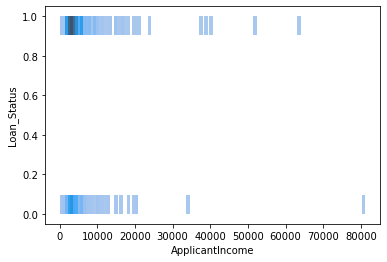

In [32]:
sns.histplot(x='ApplicantIncome',y='Loan_Status',data=loan_data)
plt.show()

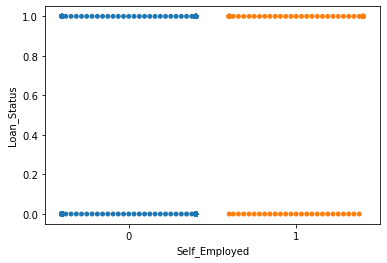

In [34]:
sns.swarmplot(x='Self_Employed',y='Loan_Status',data=loan_data)
plt.show()

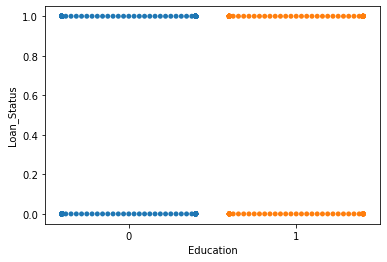

In [26]:
sns.swarmplot(x='Education',y='Loan_Status',data=loan_data)
plt.show()

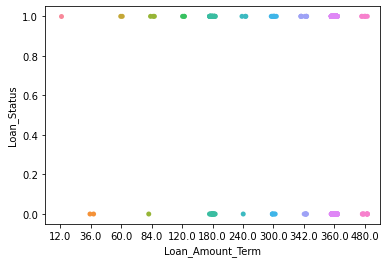

In [27]:
sns.stripplot(x='Loan_Amount_Term',y='Loan_Status',data=loan_data)
plt.show()

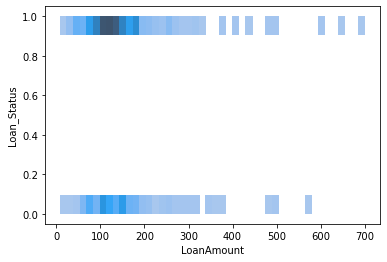

In [35]:
sns.histplot(x='LoanAmount',y='Loan_Status',data=loan_data)
plt.show()

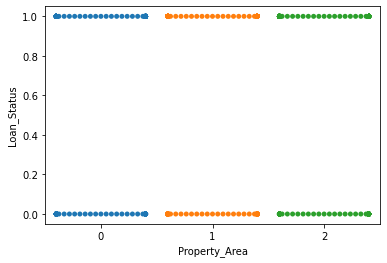

In [29]:
sns.swarmplot(x='Property_Area',y='Loan_Status',data=loan_data)
plt.show()

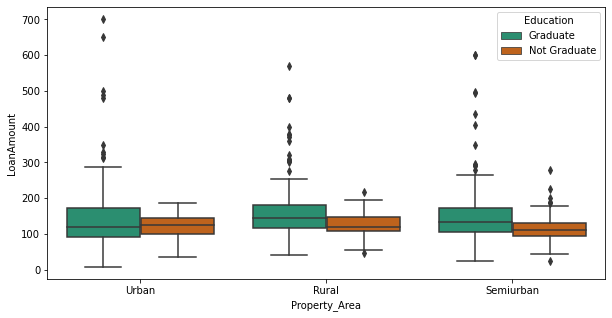

In [135]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Property_Area", y="LoanAmount", hue="Education",data=loan_data, palette="Dark2")
plt.show()

The higher values of Loan are mostly from Urban area.

In the Rural and semiurban area the graduates take more amount of Loan than non graduates

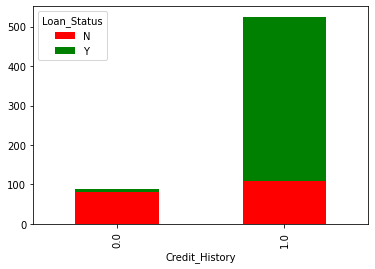

In [136]:
pd.crosstab(loan_data_1['Credit_History'],loan_data['Loan_Status']).plot(kind='bar',stacked=True,color=['r','g'])
plt.show()

With better credit History the Loan amount given was greater too.

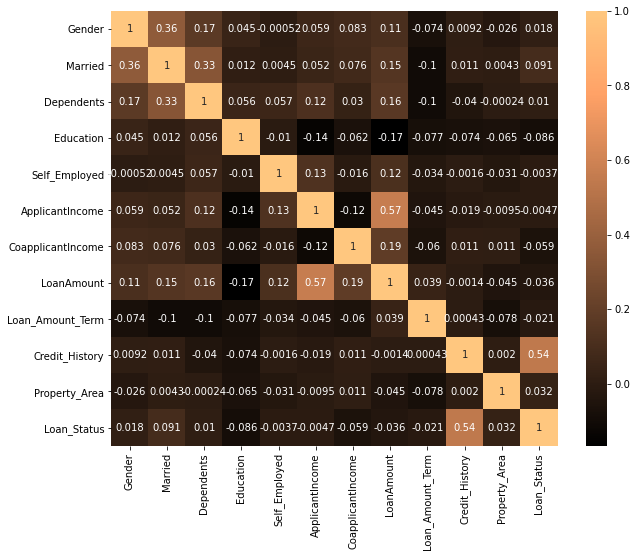

In [149]:
plt.figure(figsize=(10,8))
sns.heatmap(loan_data.corr(),annot=True,cmap='copper')
plt.show()

The Correlation is best with credit history.

# Building Machine Learning Model

**Splitting the Data into features and vectors**

In [166]:
x=loan_data.drop('Loan_Status',axis = 1 )
y=loan_data['Loan_Status']
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.3,random_state =43)

**LogisticRegression**

In [167]:
log = LogisticRegression()
log.fit(xtrain , ytrain)
pred_l = log.predict(xtest)
acc_l = accuracy_score(ytest , pred_l)*100
print('Accuracy Score: ',acc_l,'%\n\n')
print(confusion_matrix(ytest , pred_l),'\n\n')
print(classification_report(ytest , pred_l))

Accuracy Score:  81.08108108108108 %


[[ 29  33]
 [  2 121]] 


              precision    recall  f1-score   support

           0       0.94      0.47      0.62        62
           1       0.79      0.98      0.87       123

    accuracy                           0.81       185
   macro avg       0.86      0.73      0.75       185
weighted avg       0.84      0.81      0.79       185



**RandomForestClassifier**

In [172]:
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(xtrain, ytrain)
pred_r = random_forest.predict(xtest)
acc_r = accuracy_score(ytest , pred_r)*100
print('Accuracy Score: ',acc_r,'%\n\n')
print(confusion_matrix(ytest , pred_r),'\n\n')
print(classification_report(ytest , pred_r))

Accuracy Score:  80.0 %


[[ 31  31]
 [  6 117]] 


              precision    recall  f1-score   support

           0       0.84      0.50      0.63        62
           1       0.79      0.95      0.86       123

    accuracy                           0.80       185
   macro avg       0.81      0.73      0.74       185
weighted avg       0.81      0.80      0.78       185



**KNeighborsClassifier**

In [173]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(xtrain, ytrain)
pred_knn = knn.predict(xtest)
acc_knn = accuracy_score(ytest , pred_knn)*100
print('Accuracy Score: ',acc_knn,'%\n\n')
print(confusion_matrix(ytest , pred_knn),'\n\n')
print(classification_report(ytest , pred_knn))

Accuracy Score:  63.78378378378379 %


[[ 18  44]
 [ 23 100]] 


              precision    recall  f1-score   support

           0       0.44      0.29      0.35        62
           1       0.69      0.81      0.75       123

    accuracy                           0.64       185
   macro avg       0.57      0.55      0.55       185
weighted avg       0.61      0.64      0.62       185



In [174]:
multinomial = MultinomialNB()
multinomial.fit(xtrain, ytrain)
pred_mn =multinomial.predict(xtest)
acc_mn = accuracy_score(ytest , pred_mn)*100
print('Accuracy Score: ',acc_mn,'%\n\n')
print(confusion_matrix(ytest , pred_mn),'\n\n')
print(classification_report(ytest , pred_mn))

Accuracy Score:  45.94594594594595 %


[[23 39]
 [61 62]] 


              precision    recall  f1-score   support

           0       0.27      0.37      0.32        62
           1       0.61      0.50      0.55       123

    accuracy                           0.46       185
   macro avg       0.44      0.44      0.43       185
weighted avg       0.50      0.46      0.47       185



# Cross validation score

In [179]:
from sklearn.model_selection import cross_val_score
#Cross Validation score for LogisticRegression
for j in range(2,10):
    lsscore=cross_val_score(log,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("cross validation score is:-",lsc*100)
    print('accuracy_score is:-',acc_l,'\n\n')

At cv:- 2
cross validation score is:- 80.45602605863192
accuracy_score is:- 81.08108108108108 


At cv:- 3
cross validation score is:- 80.45990754025189
accuracy_score is:- 81.08108108108108 


At cv:- 4
cross validation score is:- 80.62452253628724
accuracy_score is:- 81.08108108108108 


At cv:- 5
cross validation score is:- 80.61975209916034
accuracy_score is:- 81.08108108108108 


At cv:- 6
cross validation score is:- 80.13198807030902
accuracy_score is:- 81.08108108108108 


At cv:- 7
cross validation score is:- 80.13696074040901
accuracy_score is:- 81.08108108108108 


At cv:- 8
cross validation score is:- 80.622009569378
accuracy_score is:- 81.08108108108108 


At cv:- 9
cross validation score is:- 80.45846357866817
accuracy_score is:- 81.08108108108108 




In [181]:
#Cross Validation score for random_forest
for j in range(2,10):
    lsscore=cross_val_score(random_forest,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("cross validation score is:-",lsc*100)
    print('accuracy_score is:-',acc_r,'\n\n')

At cv:- 2
cross validation score is:- 79.31596091205212
accuracy_score is:- 80.0 


At cv:- 3
cross validation score is:- 77.85031085604973
accuracy_score is:- 80.0 


At cv:- 4
cross validation score is:- 78.50670571258806
accuracy_score is:- 80.0 


At cv:- 5
cross validation score is:- 79.32293749167
accuracy_score is:- 80.0 


At cv:- 6
cross validation score is:- 79.47839329906719
accuracy_score is:- 80.0 


At cv:- 7
cross validation score is:- 78.17771309150618
accuracy_score is:- 80.0 


At cv:- 8
cross validation score is:- 78.83415926179084
accuracy_score is:- 80.0 


At cv:- 9
cross validation score is:- 78.17561807331627
accuracy_score is:- 80.0 




In [183]:
lsscore_selected =cross_val_score(log,x,y,cv=4).mean()
print('The cv Score is:-',lsscore_selected*100,'\nThe accuracy score is:-',acc_l)

The cv Score is:- 80.62452253628724 
The accuracy score is:- 81.08108108108108


**ROC AUC Curve:**

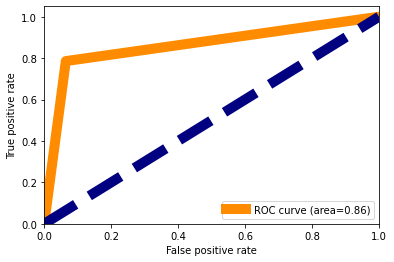

In [184]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_l,ytest)
roc_auc= auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

# Saving The Best Model 

In [186]:
import pickle
filename='Loan_prediction.pkl'
pickle.dump(log,open(filename,'wb'))

# Conclusion:

In [189]:
a=np.array(ytest)
predicted=np.array(log.predict(xtest))
df_com=pd.DataFrame({'original':a,"predicted":predicted},index=range(len(a)))
df_com

,original,predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
180,0,0
181,1,1
182,0,0
183,0,1
